<font color = green>

##  HANDWRITTEN TEXT
    (variant 2)

</font>



<font color = green>

###  Load the data 

</font>



In [ ]:
import os
os.getcwd()

'/content'

In [11]:
from scipy.io import loadmat
import os
from sklearn.model_selection import train_test_split


path = 'data'
fn = os.path.join(path , 'digits.mat')
mat= loadmat(fn)
X = mat['X']
y = mat['y'].ravel()
y = y%10 # make 10 to 0 
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)



X_train.shape= (3750, 400)
X_test.shape= (1250, 400)
y_train.shape= (3750,)
y_test.shape= (1250,)


<font color = green>

###  Normalize data

</font>

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.fit_transform(X_test, y_test)

<font color = green>

###  Visualize the data

</font>



In [13]:
import numpy as np
import matplotlib.pyplot as plt
def draw_pixels_img(x, ax = None, title=None):
    '''
    :param x: ndarray - row
    '''

    img_width = int(np.sqrt(x.shape[0]))
    img_height = x.shape[0]/img_width
    try:
        data = x.reshape(img_width, -1).T
    except:
        SystemExit('Cannot compute the size of the picture')
    if ax:
        plt.sca(ax)
    else:
        plt.figure(figsize=(2, 8))
    
    plt.imshow(data, cmap='Greys', interpolation='nearest')
    plt.axis('off')
    if not title is None:
        plt.title(title)


<font color = green>

###  YOUR CODE FOR 1,2 and 3-LAYERS MLP CLASSIFIER
</font>



<font color = green>

###  One layer MLP CLASSIFIER
</font>

In [14]:
from sklearn.neural_network import MLPClassifier

# one layer MPL Classifier
clf = MLPClassifier(solver='sgd', activation='logistic', max_iter=300)
clf.fit(X_train_scaled, y_train)

print("One layer train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("One layer test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

One layer train accuracy= 84.160%
One layer test accuracy= 85.200%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<font color = green>

###  Two layers MLP CLASSIFIER
</font>

In [15]:

clf = MLPClassifier((3,3), solver='sgd', activation='logistic', max_iter=300)
clf.fit(X_train_scaled, y_train)

print(f"\nlogistic")
print("Two layers train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("Two layers test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))
print("-" * 20)


clf = MLPClassifier((3,3), solver='sgd', activation='relu', max_iter=300)
clf.fit(X_train_scaled, y_train)

print(f"\nrelu")
print("Two layers train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("Two layers test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))
print("-" * 20)


logistic
Two layers train accuracy= 10.160%
Two layers test accuracy= 9.520%
--------------------

relu
Two layers train accuracy= 50.320%
Two layers test accuracy= 46.480%
--------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<font color = green>

###  Three layers MLP CLASSIFIER
</font>

In [16]:

clf = MLPClassifier((20,7,10), solver='sgd', activation="relu", max_iter=300)
clf.fit(X_train_scaled, y_train)

print(f"\nrelu")
print("three layers train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("three layers test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))
print("-" * 20)


clf = MLPClassifier((20,7,10), solver='sgd', activation="logistic", max_iter=300)
clf.fit(X_train_scaled, y_train)

print(f"\nlogistic")
print("three layers train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("three layers test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))
print("-" * 20)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



relu
three layers train accuracy= 89.520%
three layers test accuracy= 86.000%
--------------------

logistic
three layers train accuracy= 10.133%
three layers test accuracy= 9.600%
--------------------


<font color = green>

###  Visualize
</font>



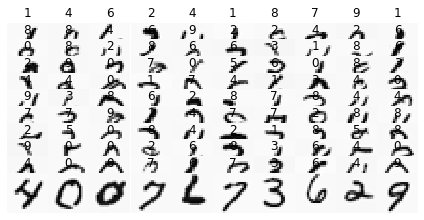

In [20]:
import matplotlib.pyplot as plt

def draw_digits_samples(X,n_rows= 10, n_cols = 10, y=None):
    indices = np.random.randint(0, len(X), n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            if y is None: 
                draw_pixels_img(X[indices[index]], ax)
            else:
                draw_pixels_img(X[indices[index]], ax, title=y[indices[index]])
    plt.tight_layout(h_pad=-10) 

fig = plt.figure()

# draw_digits_samples(X_train,X_train_scaled, n_rows= 4, n_cols = 6, clf = clf)
predicted= clf.predict(X_test_scaled)
draw_digits_samples(X_test, n_rows= 10, n_cols = 10, y = predicted)



### Compare with SVM 

In [18]:
from sklearn.svm import SVC

In [19]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 93.920%
test accuracy= 91.840%
